In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        df = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
df = pd.read_csv("airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df["Month"] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)


C:\Users\Zeno\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


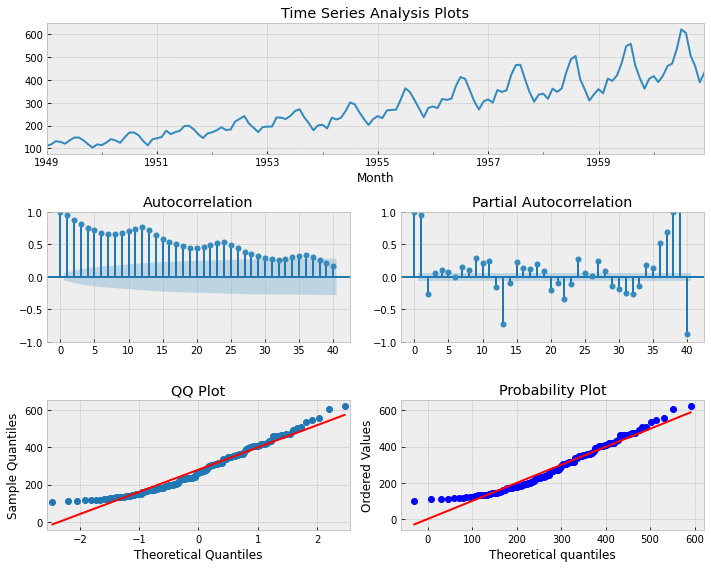

In [5]:
tsplot(df['Passengers'],lags=40)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
dff = np.diff(df['Passengers'])

## detrend series

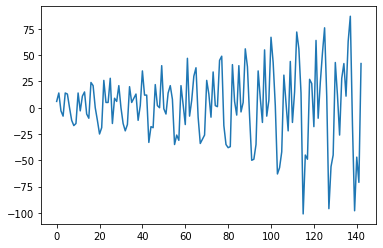

In [11]:
plt.plot(dff)

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\Zeno\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


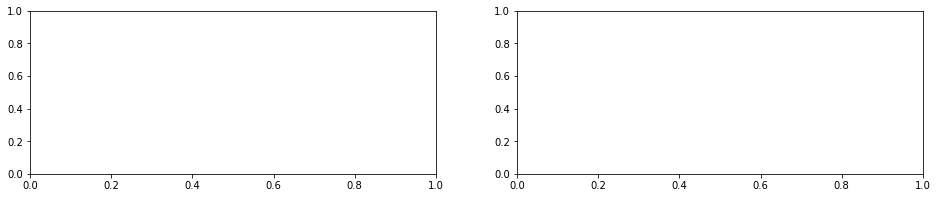

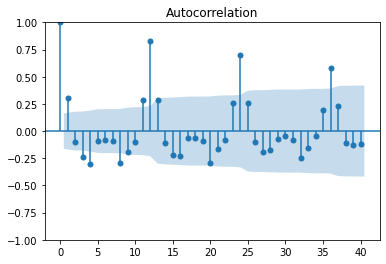

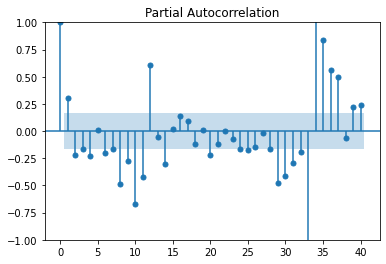

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,3))
axes[0] = plot_acf(dff,lags=40)
axes[1] = plot_pacf(dff,lags=40)

## remove sesonality 

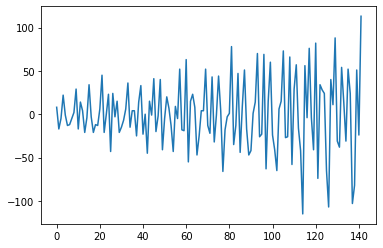

In [15]:
dff1 = np.diff(dff)
plt.plot(dff1)

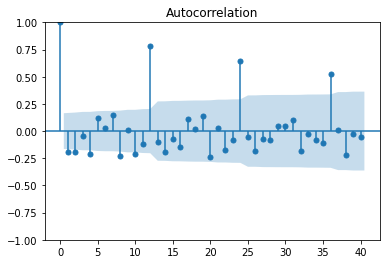

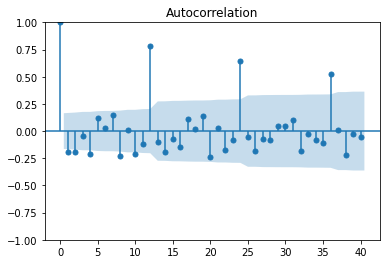

In [18]:
plot_acf(dff1,lags=40)

### seasonal moving average model

In [20]:
from statsmodels.tsa.arima_model import ARIMA


In [21]:
!pip install pmdarima

  Using cached Cython-0.29.24-cp39-cp39-win_amd64.whl (1.7 MB)


In [22]:
from pmdarima import auto_arima

In [25]:
arima_model = auto_arima(df['Passengers'], start_P=1,d=1,start_q=1,max_P=5,max_q=5,max_d=3,m=12,start_p=0,D=1,start_Q=0,max_p=5,max_D=5,max_Q=5,
seasonal=True,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.44 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.98 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.60 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.82 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.47 sec
 ARIMA(0,1,1)(3,1,0)[12]     

In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 20 Nov 2021   AIC                           1019.178
Time:                                     15:19:08   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
size = int(len(df)*0.66)
x_train,x_test = df[0:size],df[size:len(df)]

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
model = SARIMAX(x_train['Passengers'],
order =(0,1,1),
seasonal_order=(2,1,1,12))

C:\Users\Zeno\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zeno\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [30]:
result = model.fit()


In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.270
Date:                            Sat, 20 Nov 2021   AIC                            610.539
Time:                                    15:25:29   BIC                            622.573
Sample:                                01-01-1949   HQIC                           615.370
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3198      0.102     -3.145      0.002      -0.519      -0.121
ar.S.L12       0.6842      0.651      1.051      0.293      -0.592       1.960
ar.S.L24       0.3143      0.136      2.304      0.021       0.047       0.582
ma.S.L12      -0.9783      5.130     -0.191      0.849     -11.033       9.077
sigma2        78.7710    352.719      0.223      0.823    -612.546     770.088
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start_index = 0
end_index = len(x_train)-1
train_prediction = result.predict(start_index,end_index)

### predection

In [35]:
start_index = len(x_train)
end_index = len(df)-1
predection = result.predict(start_index,end_index).rename('predection passenger')

<AxesSubplot:xlabel='Month'>

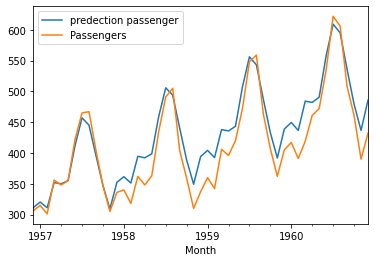

In [36]:
predection.plot(legend=True)
x_test['Passengers'].plot(legend=True)

In [38]:
forcast = result.predict(start=len(df),
end=(len(df)-1)+3*12,
typ='levels').rename('forcast')

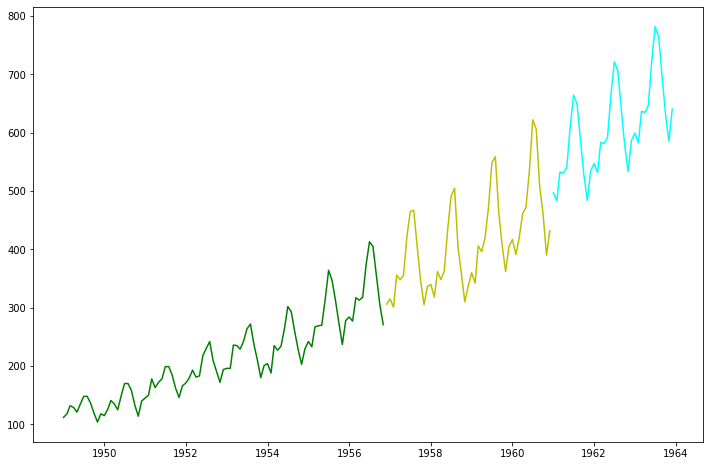

In [41]:
plt.figure(figsize=(12,8))
plt.plot(x_train,label = 'training', color='g')
plt.plot(x_test,label = 'test', color='y')
plt.plot(forcast,label='forcast', color='cyan')
#plt.legend(loc='left corner')
plt.show()